# Movies on Netflix, Prime Video, Hulu and Disney+

**Content**

The dataset is an amalgamation of:
-data that was scraped from Reelgood.com, which comprised a comprehensive list of movies available on various streaming platforms
-IMDb dataset

**Inspiration**

* Which streaming platform(s) can I find this movie on?
* Average IMDb ratings of a movie produced in a country?
* Target age group movies vs the streaming application they can be found on
* The year during which a movie was produced and the streaming platform they can be found on
* Analysis of the popularity of a movie vs directors

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data_movies = pd.read_csv("MoviesOnStreamingPlatforms.csv/MoviesOnStreamingPlatforms_updated.csv")

In [40]:
data_movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [41]:
columns = data_movies.columns.values.tolist()
columns

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [42]:
data_movies.drop([columns[0], columns[1]], axis = 1, inplace = True)

In [43]:
data_movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [46]:
data_movies.shape

(16744, 15)

In [55]:
data_movies.dropna(axis=0, how="any", inplace = True)

In [56]:
data_movies.shape

(3301, 15)

In [57]:
data_movies["Rotten Tomatoes"].dtype

dtype('O')

Text(0.5, 1.0, 'Histograma número de películas por año')

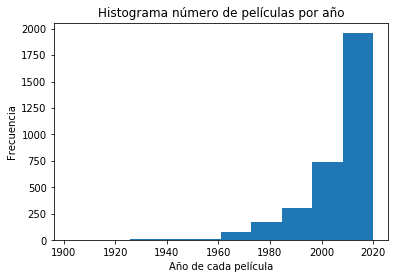

In [58]:
plt.hist(data_movies["Year"])
plt.xlabel("Año de cada película")
plt.ylabel("Frecuencia")
plt.title("Histograma número de películas por año")

Text(0.5, 1.0, 'Histograma número de películas por edades')

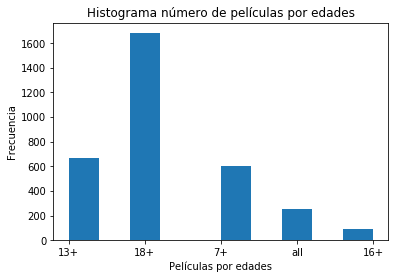

In [65]:
plt.hist(data_movies["Age"])
plt.xlabel("Películas por edades")
plt.ylabel("Frecuencia")
plt.title("Histograma número de películas por edades")

Text(0.5, 1.0, 'Histograma películas por plataformas')

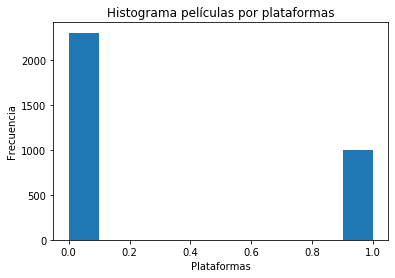

In [67]:
plt.hist(data_movies["Netflix"])
plt.xlabel("Plataformas")
plt.ylabel("Frecuencia")
plt.title("Histograma películas por plataformas")